# 目的
このファイルでは、等差数列の和と等比数列の和を視覚的に理解することを目的とする

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import japanize_matplotlib
import pandas as pd

## 用語

数列    ：項を複数並べたもの  
項      ：値のこと  
初項　　：第１項目の項  
末項　　：最後の項  
項数　　：数列の項の数  
一般項　：数列第n項目の項$a_n$をnの式で表したもの  
等差数列：隣り合う項同士の差が一定である数列  
等比数列：隣り合う項同士の比が一定である数列  

## 1. 等比数列の和の公式が成り立つ様子を視覚化する  
※等差をd、項数をnとする。  

**等比数列の一般項の公式**  
$$
a_n = a_1 + (n - 1)d
$$

**等比数列の和の公式**
$$
S = \frac{1}{2} (a_1 + a_1 + (n - 1)d)
$$

In [3]:
def make_arithmetic_progression(n, d, a1) -> np.array : 
    """n = 項数, d =  等差, a1 =  初項"""

    an = a1 + (n - 1) * d # 末項

    # 数列を生成
    arithmetic_progression = np.arange(a1, an + 1, d)
    return arithmetic_progression

[ 3  5  7  9 11 13 15 17 19 21]


Text(0.5, 1.0, '等差数列の和の可視化')

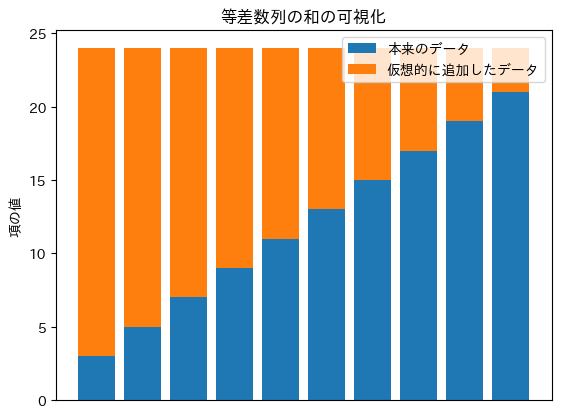

In [ ]:
n = 10
d = 2
a1 = 3
arithmetic_progression = make_arithmetic_progression(10, 2, 3)
reversed_arithmetic_progression = np.flip(arithmetic_progression)

df = pd.DataFrame({
    "index": np.arange(n),  # x軸
    "value": arithmetic_progression  # y軸
})

for i in range(2):

    if i == 0:
        ax = plt.bar(x=df["index"], height=df["value"], bottom=0, label="本来のデータ")
    else:
        bottom = i *arithmetic_progression # 棒グラフを描画し始める高さ
        ax = plt.bar(x=df["index"], height=reversed_arithmetic_progression, bottom=bottom, label="仮想的に追加したデータ")

    # 棒の中に値を追加
    # for j, value in enumerate(df["value"]):
    #     ax.text(j, value / 2, str(value), ha="center")

plt.legend()
plt.xticks([])
plt.ylabel("項の値")
plt.xlabel("")
plt.title("等差数列の和の可視化")